***BUSINESS UNDERSTANDING***

#### PROBLEM STATEMENT
One of the main challenges that football fanatics face is making accurate predictions when they bet in pursuit to win cash prices.The current manual approach for determining odds and probabilities is prone to human error and lacks consistency. We develop a robust and reliable machine learning model that can accurately forecast the results of football matches, enabling them to set more precise odds.

***DATA UNDERSTANDING***

In this section we will explore our data by checking:

- Inspecting the first and last five rows
- Number of rows and columns
- Data types of each feature
- Data quality(outliers,null values and duplicates)
- Summary statistics




#### Importing Necessary Dependencies

In [1]:
!pip install pandas_profiling -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.1 MB/s eta 0:00:00


In [2]:
# mathematical computations
import numpy as np

# data manipulation
import pandas as pd
import pandas_profiling as pp
from pandas_profiling import ProfileReport

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# warnings
import warnings
warnings.filterwarnings('ignore')


<ipython-input-2-c32a4ca3905b>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# load data
data = pd.read_csv('/content/gdrive/MyDrive/football_prediction/data/results.csv')


In [5]:
# number of rows and columns
shape = data.shape
print(f'The data has {shape[0]} rows and {shape[1]} columns')

The data has 44557 rows and 9 columns


In [6]:
# columns
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [7]:
# column description
column_names = ['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Tournament', 'City', 'Country', 'Neutral']
column_descriptions = ['date of the match', 'the name of the home team', 'the name of the away team', 'full-time home team score including extra time, not including penalty-shootouts', 'full-time away team score including extra time, not including penalty-shootouts', 'the name of the tournament', 'the name of the city/town/administrative unit where the match was played', 'the name of the country where the match was played', 'TRUE/FALSE column indicating whether the match was played at a neutral venue']

data_desc = list(zip(column_names, column_descriptions))
df = pd.DataFrame(data_desc, columns=['Column_Name', 'Column_Description'])

df

,Column_Name,Column_Description
0,Date,date of the match
1,Home Team,the name of the home team
2,Away Team,the name of the away team
3,Home Score,full-time home team score including extra time...
4,Away Score,full-time away team score including extra time...
5,Tournament,the name of the tournament
6,City,the name of the city/town/administrative unit ...
7,Country,the name of the country where the match was pl...
8,Neutral,TRUE/FALSE column indicating whether the match...


In [8]:
# first five rows
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
# last five rows
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False
44556,2023-03-29,Rwanda,Benin,1,1,African Cup of Nations qualification,Kigali,Rwanda,False


In [10]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44557 non-null  object
 1   home_team   44557 non-null  object
 2   away_team   44557 non-null  object
 3   home_score  44557 non-null  int64 
 4   away_score  44557 non-null  int64 
 5   tournament  44557 non-null  object
 6   city        44557 non-null  object
 7   country     44557 non-null  object
 8   neutral     44557 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


The dataset has 9 features: 2 numerical,1 boolean and 6 columns of object data type. Each column has 44557 non-null values implying that our dataset has zero null values.

In [11]:
# summary statistics
data.describe()

,home_score,away_score
count,44557.000000,44557.000000
mean,1.739278,1.178401
std,1.747263,1.393775
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [12]:
# check duplicates
data.duplicated().any()

False

In [13]:
# check null values
data.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [14]:
# check outliers

def find_outliers(data, threshold=3):
    """
    Identifies outliers in a given dataset using the z-score method.
    
    Parameters:
        - data (array-like): The dataset to be checked for outliers.
        - threshold (float): The threshold value for identifying outliers. Data points
          with a z-score greater than the threshold will be considered outliers.
          Default is 3, which is a commonly used value.
          
    Returns:
        - outliers (list): A list of the outlier values found in the dataset.
    """
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > threshold]
    
    return outliers


In [15]:
# numerical columns
num_columns = data.select_dtypes(include = 'int64')

# find outliers
for col in num_columns.columns:
  outliers = find_outliers(data[col])
  outliers_len = len(outliers)
  per_outliers = len(outliers)/len(data)*100
  print(f'{col} has {len(outliers)} outliers which is {round(per_outliers,2)}% of the entire dataset')

home_score has 889 outliers which is 2.0% of the entire dataset
away_score has 607 outliers which is 1.36% of the entire dataset


In [16]:
# visualise outliers
for col in num_columns.columns:
  fig = px.box(data, y=col)
  fig.show()


From the inspection, our data has few outliers which could be explained by the uncertain nature of football outcomes. There are scores that will be very high which rarely happens but when it does it results to our dataset to containing some outliers. For this reason we will not be dropping them.

In [17]:
# data summary
data_summary = ProfileReport(data, explorative=True)
data_summary.to_file('data_summary.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

***EXPLORATORY DATA ANALYSIS (EDA)***
---
#### In this section we will work on the following:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Answer other Questions about the dataset

#### UNIVARIATE ANALYSIS

For univariate analysis we will explore each variable independently.

In [18]:
cat_columns = data.select_dtypes(include = ['object','bool'])
cat_columns.columns

Index(['date', 'home_team', 'away_team', 'tournament', 'city', 'country',
       'neutral'],
      dtype='object')

In [20]:
# select categorical columns
cat_columns = data.select_dtypes(include = ['object','bool'])

# visualize the columns
for col in cat_columns.columns[1:5]:
    counts = data[col].value_counts().head(10)
    fig = px.bar(counts, x=counts.index, y=counts.values,color = counts.index)
    fig.update_layout(title=f'Top 10 {col} in Number of Matches Played',xaxis_title=col,yaxis_title = 'Count')
    fig.show()

In [21]:
# visualize least number of matches

for col in cat_columns.columns[1:5]:
  counts = data[col].value_counts().tail(10)
  fig = px.bar(x= counts.index,y = counts.values)
  fig.update_layout(title=f'Last 10 {col} in Number of Matches Played',xaxis_title=col,yaxis_title = 'Count')
  fig.show()

In [22]:
# Count the occurrences of each value in the 'neutral' column
counts = data['neutral'].value_counts()

# Create the pie trace
fig = go.Figure(data=go.Pie(labels=counts.index, values=counts.values))

# Show the figure
fig.show()

In [23]:
num_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   home_score  44557 non-null  int64
 1   away_score  44557 non-null  int64
dtypes: int64(2)
memory usage: 696.3 KB


In [24]:
# Create the histogram trace
for col in num_columns:
    trace = go.Histogram(x=data[col])

    # Create the layout for the histogram
    layout = go.Layout(
        title=f'{col} Frequency Distribution',
        xaxis=dict(title=col),
        yaxis=dict(title='Count')
    )

    # Combine the trace and layout into a figure
    fig = go.Figure(data=[trace], layout=layout)

    # Show the figure
    fig.show()




####  BIVARIATE ANALYSIS

In this analysis we check the relationship between different features.

In [25]:
# 
for col in cat_columns.columns[2:]:
    grouped_data = data.groupby(col)['away_score'].mean().reset_index().sort_values(by='away_score', ascending=False).head(10)
    fig = px.bar(grouped_data, x=col, y='away_score',color='away_score')
    fig.update_layout(title=f'Average Away Score by {col}', xaxis_title=col, yaxis_title='Average Away Score')
    fig.show()

In [26]:
for col in cat_columns.columns[1:]:
  if col != 'away_team':
    grouped_data = data.groupby(col)['home_score'].mean().reset_index().sort_values(by='home_score', ascending=False).head(10)
    fig = px.bar(grouped_data, x=col, y='home_score',color='home_score')
    fig.update_layout(title=f'Average Home Score by {col}', xaxis_title=col, yaxis_title='Average Home Score')
    fig.show()

**Multivariate Analysis**

The multivariate analysis is performed with more than 2 variables for any combination of categorical and continuous variables.

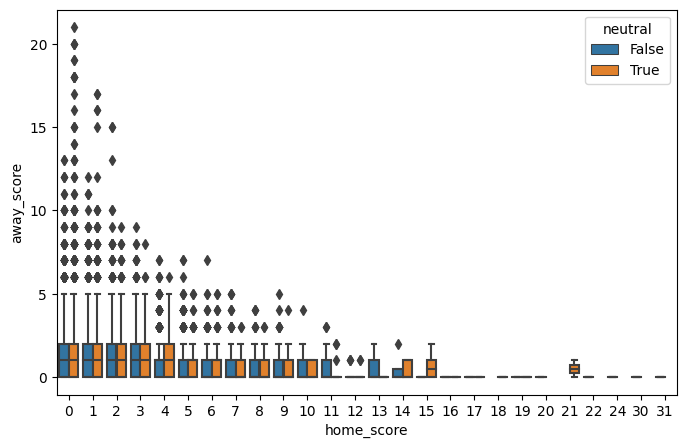

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))
testPlot = sns.boxplot(ax=ax1, x='home_score', y='away_score', hue='neutral', data=data)

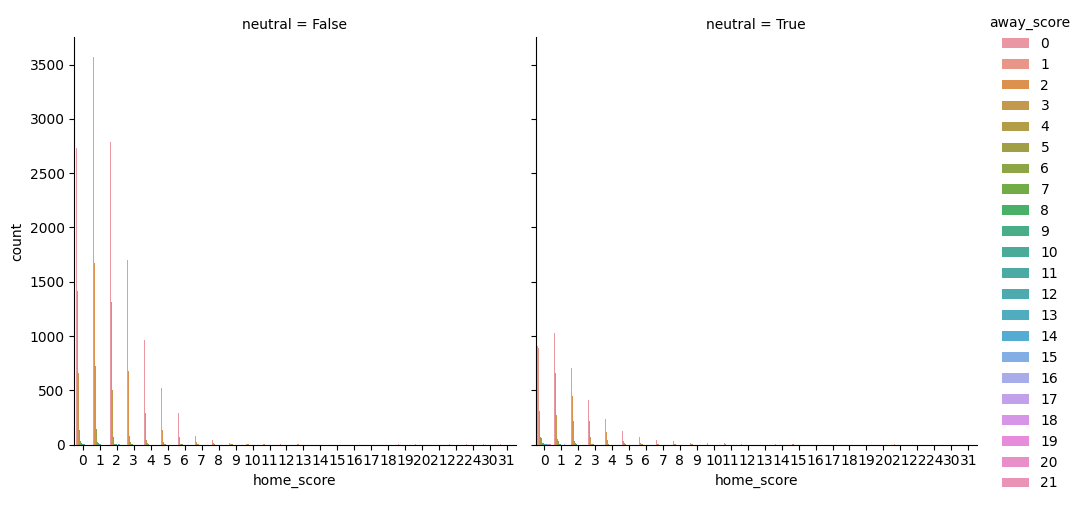

In [ ]:
sns.catplot(data=data,col = "neutral",x = "home_score", hue="away_score",kind = "count")

<Axes: >

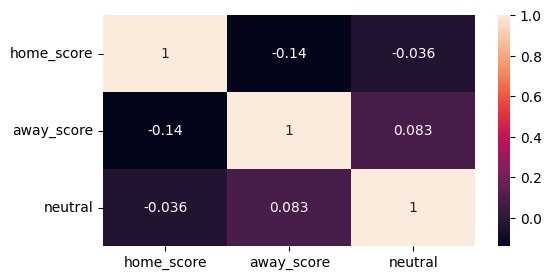

In [ ]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (6,3))
corr = data.corr()
sns.heatmap(corr,annot=True)

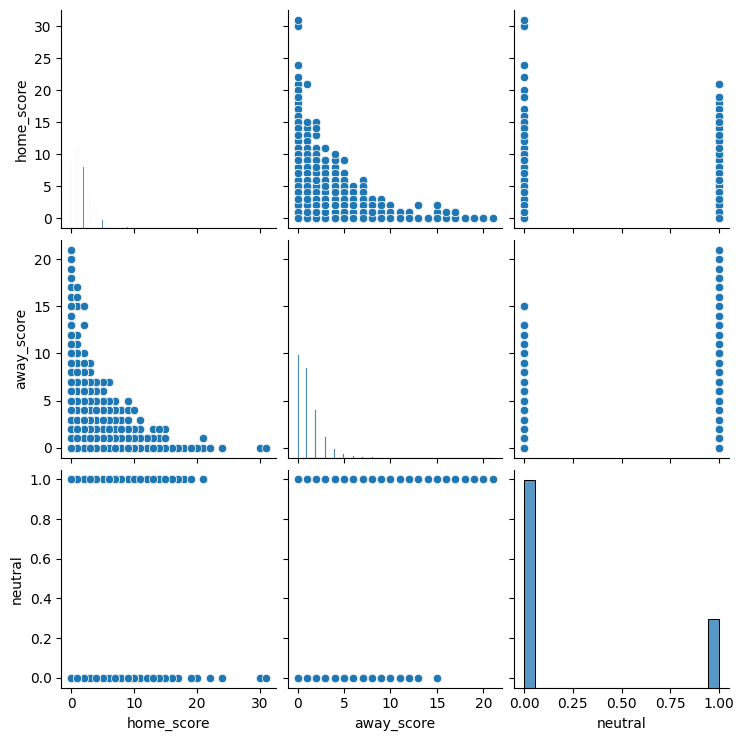

In [ ]:
sns.pairplot(data)

- **Answering Questions about the dataset**

1. Check the most playing teams at home

<Axes: xlabel='most games played at home'>

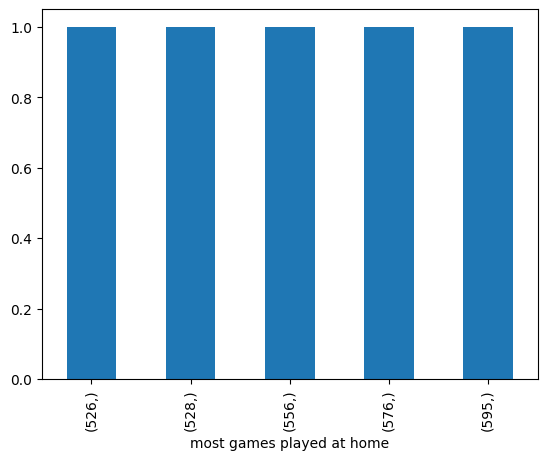

In [ ]:
home_most_played=pd.DataFrame(data["home_team"].value_counts().head())
home_most_played.columns=["most games played at home"]
home_most_played
home_most_played.value_counts().plot(kind='bar')

2. Check the least playing teams at home

In [ ]:
home_least_played=pd.DataFrame(data["home_team"].value_counts().tail())
home_least_played.columns=["least games played at home"]
home_least_played

,least games played at home
Chameria,1
Romani people,1
Saint Pierre and Miquelon,1
Western Australia,1
Madrid,1


3. Check the highest number of goals scored by home teams

In [ ]:
highest_score_home = data.sort_values('home_score', ascending=False).head().reset_index()
highest_score_home

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,result
0,24160,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,Australia,31-0
1,8027,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False,Tahiti,30-0
2,11225,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False,Fiji,24-0
3,24157,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,Australia,22-0
4,29211,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True,Sápmi,21-1


4. Check the most frequently team results

In [ ]:
data['result'] = data['home_score'].astype(str) + '-' + data['away_score'].astype(str)
most_freq_res = pd.DataFrame(data['result'].value_counts().head())
most_freq_res.columns = ['most occurence results']
most_freq_res

,most occurence results
1-0,4603
1-1,4477
0-0,3633
2-0,3486
2-1,3402


5. Check on the most winning teams

In [ ]:
df_win_team = data[data['winner'] != 'Draw']
winning_teams = pd.DataFrame(df_win_team['winner'].value_counts().head())
winning_teams.columns = ['most game won by countries']
winning_teams

,most game won by countries
Brazil,656
England,599
Germany,575
Argentina,557
Sweden,521


6. Check all competitions and number of games played in each

In [ ]:
competition = pd.DataFrame(data['tournament'].value_counts().reset_index())
competition.columns = ['tournament', 'games']
competition

,tournament,games
0,Friendly,17593
1,FIFA World Cup qualification,7878
2,UEFA Euro qualification,2631
3,African Cup of Nations qualification,1976
4,FIFA World Cup,964
...,...,...
137,Évence Coppée Trophy,1
138,Copa Confraternidad,1
139,Real Madrid 75th Anniversary Cup,1
140,TIFOCO Tournament,1


<BarContainer object of 142 artists>

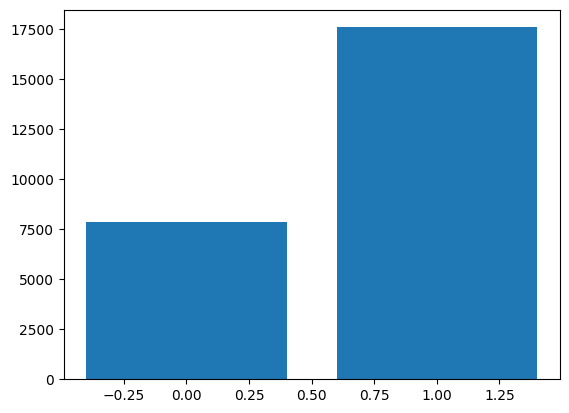

In [ ]:
plt.bar(competition['tournament'] == 'Friendly', competition['games'])

7. Check how big advantage being played at home

H    16934
A     8823
D     7723
Name: winner_cat, dtype: int64


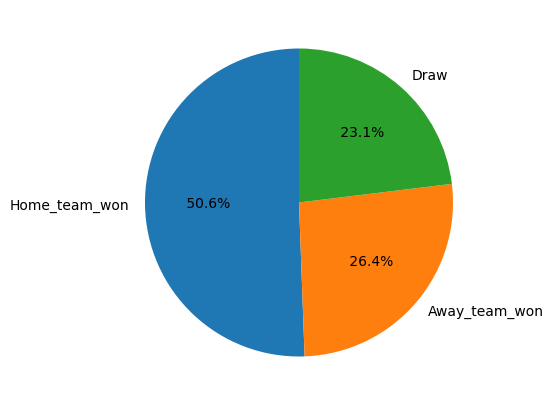

In [ ]:
# First exclude games played in neutral venues
result_home_away = data.loc[data['neutral'] == False]

# Adding a new categorical column `winner_cat` to a DataFrame `result_home_away`

result_home_away["winner_cat"] = result_home_away.apply(lambda x: "H" if x["home_team"] == x["winner"]
                                                        else ("A" if x["away_team"] == x["winner"] else "D"), axis=1)
winner_counts = result_home_away["winner_cat"].value_counts()

print(winner_counts)

# Plot the results
fig, ax =plt.subplots(figsize=(5,5))
ax=plt.pie(result_home_away["winner_cat"].value_counts(),labels=["Home_team_won","Away_team_won","Draw"],autopct="% 1.1f%%",startangle=90) 

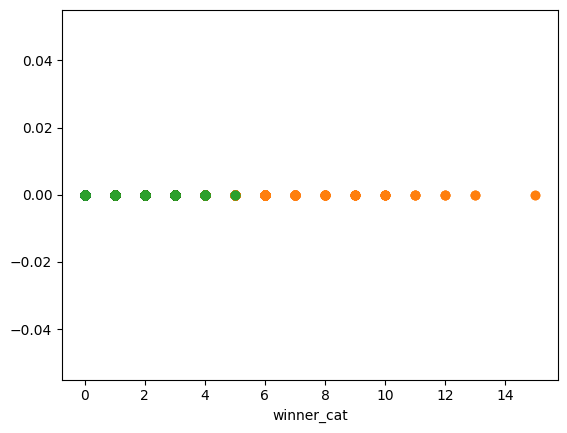

In [ ]:
df_home = result_home_away.loc[result_home_away['winner_cat'] == 'H']
df_away = result_home_away.loc[result_home_away['winner_cat'] == 'A']
df_draw = result_home_away.loc[result_home_away['winner_cat'] == 'D']
plt.plot(df_home['away_score'], np.zeros_like(df_home['away_score']), 'o')
plt.plot(df_away['away_score'], np.zeros_like(df_away['away_score']), 'o')
plt.plot(df_draw['away_score'], np.zeros_like(df_draw['away_score']), 'o')
plt.xlabel('winner_cat')
plt.show()

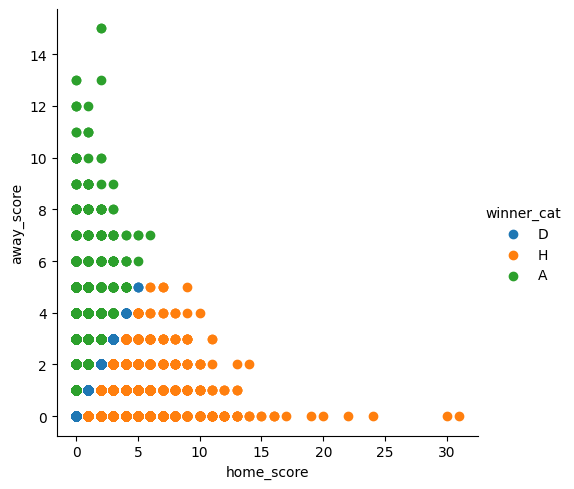

In [ ]:
sns.FacetGrid(result_home_away, hue='winner_cat', height=5).map(plt.scatter, 'home_score', 'away_score').add_legend()

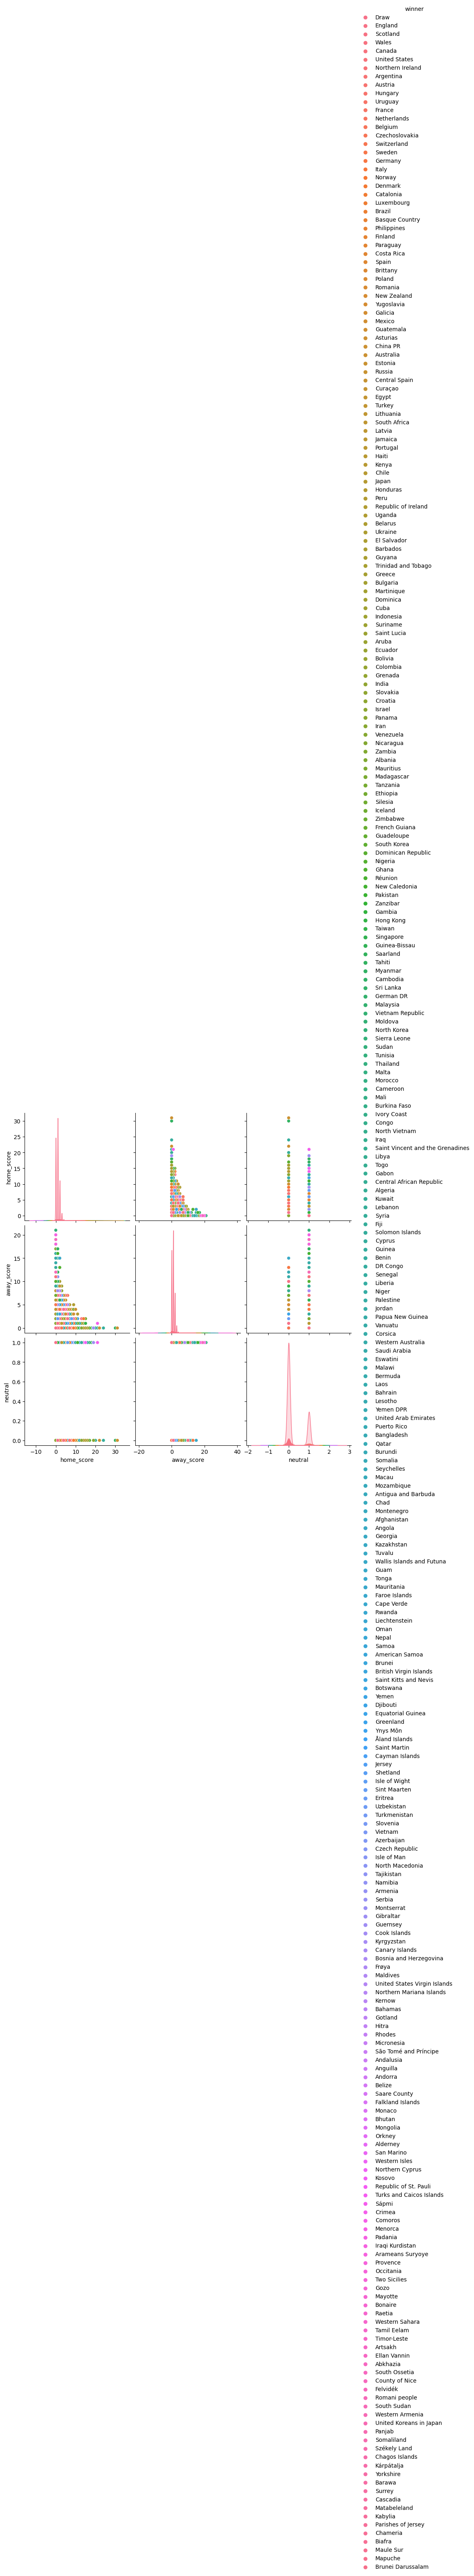

In [ ]:
sns.pairplot(data, hue='winner', height=3)

In [ ]:
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0-0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,4-2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,2-1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,2-2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3-0
...,...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti,3-1
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Draw,0-0
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands,1-2
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten,1-2


In [ ]:
def compare_scores(data):
    results = []
    for i in range(len(data)):
        home_score = data.loc[i, 'home_score']
        away_score = data.loc[i, 'away_score']
        
        if home_score > away_score:
            result = 'win'
        elif home_score < away_score:
            result = 'lose'
        else:
            result = 'draw'
        
        results.append(result)
    
    return results


In [ ]:
# Assuming you have a DataFrame called 'match_results' with columns 'home_team', 'away_team', 'home_score', and 'away_score'

results = pd.DataFrame(compare_scores(data))
results.columns = ['result']
#print(results)
results

,result
0,draw
1,win
2,win
3,draw
4,win
...,...
44552,win
44553,draw
44554,lose
44555,lose
